In [77]:
#import things
import numpy as np
from pandas import DataFrame as df
import itertools, json, os, re
import seaborn as sns
import matplotlib.pyplot as plt


In [78]:
#define lexicons and visuals

def get_cleanup_elements():
    objects = ['orange_spoon', 'pink_rug', 'blue_teapot', 'yellow_lamp']
    rooms = ['red_hall', 'green_kitchen', 'purple_bedroom']
    return rooms, objects

def get_shapeworld_elements():
    objects = sorted(['red_square', 'green_square', 'red_circle', 'green_circle'])
    attributes = sorted(['square', 'circle', 'green', 'red', 'red_square', 'red_circle', 'green_square', 'green_circle'])
    return attributes, objects

def lexicon_true(attr, obj):
    attr_items, obj_items = attr.split('_'), obj.split('_')
    return len(list(set(attr_items) & set(obj_items))) >= len(attr_items)

def hard_coded_lexicon():
    #rooms, objects = get_cleanup_elements()
    rows, cols = get_shapeworld_elements()
    nrows, ncols = len(rows), len(cols)

    matrix = np.zeros((nrows, ncols))
    for i in range(len(rows)):
        for j in range(len(cols)):
            if lexicon_true(rows[i], cols[j]):
                matrix[i][j] = 1.0
                
    print(matrix)
    dataframe = df(data = matrix, columns = cols, index = rows)
    return dataframe

def row_norm(m):
    return np.divide(m.T, np.sum(m, axis=1)).T

def col_norm(m):
    return np.divide(m, np.sum(m, axis=0))

def add_prior(objects, prior, lex):
    rows, cols = lex.index, lex.columns
    matrix = lex.values

    
    for i in range(len(prior)):
        for row in range(len(matrix)):
            matrix[row][i] *= prior[i]

            
    
    print('Fine')
    print(matrix)
    #dataframe = df(data = matrix, columns = cols, index = rows)
    print('Fine')
    matrix = row_norm(matrix)
    print('Fine')
    print(matrix)
    #dataframe = df(data = matrix, columns = cols, index = rows)
    print('Fine')
    return matrix

def visualise_df(df):
    print('Dataframe:\n', df)
    sns.set()
    refs, utterances = list(df.index), list(df.columns)
    print(refs, utterances)
    
    ax = sns.heatmap(df.values, cmap="YlGnBu")
    ax.set_xlabel('Referents'); ax.set_ylabel('Utterances')
    ax.set(yticklabels=refs)
    ax.set(xticklabels=utterances)
    plt.setp(ax.get_yticklabels(), rotation=45);
    plt.show()
    
def visualise_matrix(matrix, cols, rows, show_values):
    # get the visualisation of the matrix in the common setup to see ifit o
    print('Matrix:\n', matrix)
    sns.set()
    refs, utterances = cols, rows
    print(refs, utterances)
    
    if show_values == True:
        ax = sns.heatmap(matrix, cmap="YlGnBu", annot=True)
    else:
        ax = sns.heatmap(matrix, cmap="YlGnBu")

    #ax.set_xlabel('Referents'); ax.set_ylabel('Utterances')
    ax.set(yticklabels=refs)
    ax.set(xticklabels=utterances)
    plt.setp(ax.get_yticklabels(), rotation=45);
    plt.show()


[[1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]]
Dataframe:
               green_circle  green_square  red_circle  red_square
circle                 1.0           0.0         1.0         0.0
green                  1.0           1.0         0.0         0.0
green_circle           1.0           0.0         0.0         0.0
green_square           0.0           1.0         0.0         0.0
red                    0.0           0.0         1.0         1.0
red_circle             0.0           0.0         1.0         0.0
red_square             0.0           0.0         0.0         1.0
square                 0.0           1.0         0.0         1.0
['circle', 'green', 'green_circle', 'green_square', 'red', 'red_circle', 'red_square', 'square'] ['green_circle', 'green_square', 'red_circle', 'red_square']


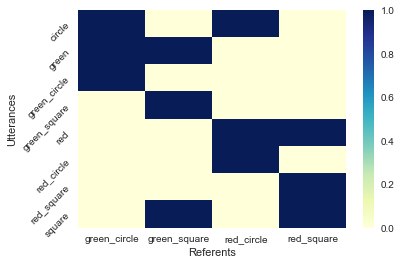

Fine
[[0.7 0.  0.1 0. ]
 [0.7 0.1 0.  0. ]
 [0.7 0.  0.  0. ]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0.1]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  0.1]
 [0.  0.1 0.  0.1]]
Fine
Fine
[[0.875 0.    0.125 0.   ]
 [0.875 0.125 0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.5   0.5  ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.5   0.    0.5  ]]
Fine
Matrix:
 [[0.7, 0.1, 0.1, 0.1]]
['Prior'] ['green_circle', 'green_square', 'red_circle', 'red_square']


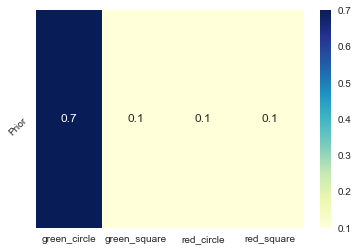

Matrix:
 [[0.875 0.    0.125 0.   ]
 [0.875 0.125 0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.5   0.5  ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.5   0.    0.5  ]]
['circle', 'green', 'green_circle', 'green_square', 'red', 'red_circle', 'red_square', 'square'] ['green_circle', 'green_square', 'red_circle', 'red_square']


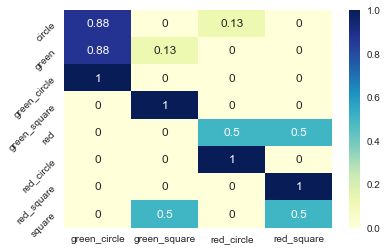

In [79]:
# testing utils

df = hard_coded_lexicon()
visualise(df)
matrix = add_prior([], [0.7, 0.1, 0.1, 0.1], df)
# trying to visualise the prior
visualise_matrix([[0.7, 0.1, 0.1, 0.1]], ['Prior'], list(df.columns), True)
visualise_matrix(matrix, list(df.index), list(df.columns), True)

In [80]:
#define modules for agents

In [81]:
#define the classifier and referent signal